#이미지 dataset 설정

In [148]:
# 작업 경로 설정
import os
os.chdir(r"/content/drive/MyDrive/Colab Notebooks/00.study/10.knou")
!pwd
!ls

/content/drive/MyDrive/Colab Notebooks/00.study/10.knou
02_패턴인식기_2차원데이터.ipynb  digitimages_binary.zip
02_패턴인식기_영상데이터.ipynb	 number_images


In [149]:
!rm -rf ./number_images
!unzip ./digitimages_binary.zip -d ./number_images
!ls ./number_images

Archive:  ./digitimages_binary.zip
  inflating: ./number_images/digit0_1.bmp  
  inflating: ./number_images/digit0_2.bmp  
  inflating: ./number_images/digit0_3.bmp  
  inflating: ./number_images/digit0_4.bmp  
  inflating: ./number_images/digit0_5.bmp  
  inflating: ./number_images/digit0_6.bmp  
  inflating: ./number_images/digit0_7.bmp  
  inflating: ./number_images/digit1_1.bmp  
  inflating: ./number_images/digit1_2.bmp  
  inflating: ./number_images/digit1_3.bmp  
  inflating: ./number_images/digit1_4.bmp  
  inflating: ./number_images/digit1_5.bmp  
  inflating: ./number_images/digit1_6.bmp  
  inflating: ./number_images/digit1_7.bmp  
  inflating: ./number_images/digit2_1.bmp  
  inflating: ./number_images/digit2_2.bmp  
  inflating: ./number_images/digit2_3.bmp  
  inflating: ./number_images/digit2_4.bmp  
  inflating: ./number_images/digit2_5.bmp  
  inflating: ./number_images/digit2_6.bmp  
  inflating: ./number_images/digit2_7.bmp  
  inflating: ./number_images/digit3_1.bmp

# 이미지 데이터 행렬 변환

In [150]:
import cv2 as cv
cv.__version__

'4.1.2'

## 이미지 한개 이진화 

### opencv 사용 방식 - 연습용

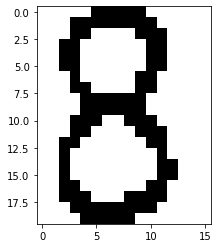

In [151]:
image_unchange = cv.imread("./number_images/digit8_1.bmp", cv.IMREAD_UNCHANGED)
image_unchange.size, image_unchange.shape, type(image_unchange)
import matplotlib.pyplot as plt
plt.imshow(image_unchange, cmap='gray')

In [152]:
image_bgr = cv.imread("./number_images/digit8_1.bmp")
image_bgr.size, image_bgr.shape, type(image_bgr)

(960, (20, 16, 3), numpy.ndarray)

In [153]:
dim = (16,20)  # (width, height)
image_bgr = cv.resize(image_bgr, dim)
image_gray = cv.cvtColor(image_bgr, cv.COLOR_BGR2GRAY)
image_gray.size, image_gray.shape, type(image_gray)

(320, (20, 16), numpy.ndarray)

In [154]:
ret, image_binary = cv.threshold (image_gray, 127, 255, cv.THRESH_BINARY_INV)
image_binary.size, image_binary.shape, type(image_binary)

(320, (20, 16), numpy.ndarray)

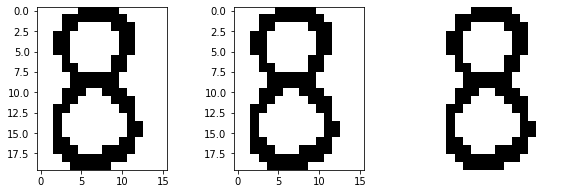

In [155]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1, 3, figsize=(10, 3))
plt.axis("off")
axs[0].imshow(image_bgr)
axs[1].imshow(image_gray, cmap='gray')
axs[2].imshow(image_binary, cmap=plt.cm.binary)

In [156]:
digit_flat = image_binary.reshape(-1)
digit_flat.size, digit_flat.shape

(320, (320,))

### Pillow 사용 방식

In [157]:
from PIL import Image 
image_binary = Image.open("./number_images/digit8_1.bmp") # open colour image
image_binary.format, image_binary.size, image_binary.mode,  type(image_binary)

('BMP', (16, 20), '1', PIL.BmpImagePlugin.BmpImageFile)

In [158]:
import numpy as np
image_binary = np.array(image_binary)
image_binary.shape, type(image_binary)

((20, 16), numpy.ndarray)

In [159]:
digit_flat = image_binary.reshape(1,-1)
digit_flat.size, digit_flat.shape, #digit_flat

(320, (1, 320))

In [160]:
import numpy as np    
flat_size = digit_flat.size
arr = np.empty([0,flat_size], int)
print("Empty array:")
arr, arr.shape, type(arr)

Empty array:


(array([], shape=(0, 320), dtype=int64), (0, 320), numpy.ndarray)

In [161]:
arr = np.append(arr, digit_flat, axis=0)
arr, arr.shape 

(array([[1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
         0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0,
         1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
         0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
         1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
         1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1,
         1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
         1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
         1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
         0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
         1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1,
         1, 1, 1, 1, 1, 0

## 이미지 여러개 이진화 및 행렬화

In [182]:
from PIL import Image 
import numpy as np
train_feature, train_label_list = np.empty([0,flat_size]), list()
test_feature, test_label_list = np.empty([0,flat_size]), list()
for digit in range(10):
  for count in range(1,8):
    image_path = "./number_images/digit{}_{}.bmp".format(digit, count)
    image_binary = Image.open(image_path) # open colour image
    image_binary = np.array(image_binary)
    digit_flat = image_binary.reshape(1,-1)
    # print(digit_flat.shape)
    if count <= 2:
      test_feature = np.append(test_feature,digit_flat, axis=0)
      test_label_list.append(digit)
    else :
      train_feature = np.append(train_feature,digit_flat, axis=0)
      train_label_list.append(digit)

test_label = np.array(test_label_list).reshape(-1, 1)
train_label = np.array(train_label_list).reshape(-1, 1)

In [183]:
train_feature.shape, train_label.shape, test_feature.shape, test_label.shape

((50, 320), (50, 1), (20, 320), (20, 1))

# 결정경계 : 각 숫자마다 열에 평균 벡터 구하기

## 평균 구해 표시 - 연습

In [164]:
train_feature[11], train_label[0:5], #test_feature[17], test_label[17]

(array([1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1.,
        1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0.,
        0., 0., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0.,
        1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1., 1., 0., 0., 0., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 0., 0., 0., 1., 1.,
        1., 1., 1., 1., 1., 1., 0., 0., 0., 1., 1., 0., 0., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.,
        0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0.,
        0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1.,
        1., 

In [165]:
indices = np.where(train_label == 2)  # 숫자 2
indices, type(indices), type(indices[0]), type(indices[0].tolist()), indices[0].tolist()

((array([10, 11, 12, 13, 14]), array([0, 0, 0, 0, 0])),
 tuple,
 numpy.ndarray,
 list,
 [10, 11, 12, 13, 14])

In [166]:
train_mean = np.mean(train_feature[indices[0].tolist()], axis=0)  # 행 단위 평균
train_mean.shape, train_mean

((320,),
 array([1. , 1. , 1. , 0.8, 0.8, 0.4, 0.4, 0.4, 0.4, 0.4, 0.6, 1. , 1. ,
        1. , 1. , 1. , 1. , 1. , 0.8, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0. ,
        0. , 0.2, 0.4, 0.8, 1. , 1. , 0.8, 0.8, 0.2, 0.2, 0.4, 0.6, 0.6,
        0.4, 0.2, 0.2, 0. , 0. , 0.2, 0.4, 0.8, 0.8, 0.8, 0.4, 0.2, 0.6,
        0.6, 1. , 0.8, 0.8, 0.8, 0.8, 0.4, 0.2, 0.2, 0.2, 0.8, 0.8, 0.6,
        0.4, 0.6, 0.8, 1. , 1. , 1. , 1. , 1. , 1. , 0.8, 0.4, 0.2, 0.4,
        0.8, 0.8, 0.6, 0.6, 0.6, 0.8, 1. , 1. , 1. , 1. , 1. , 1. , 1. ,
        0.2, 0.2, 0.2, 0.6, 0.8, 0.6, 0.6, 0.8, 1. , 1. , 1. , 1. , 1. ,
        1. , 1. , 1. , 0.2, 0.2, 0.2, 0.4, 0.8, 1. , 1. , 1. , 1. , 1. ,
        1. , 1. , 1. , 1. , 1. , 0.6, 0.2, 0.2, 0.2, 0.8, 1. , 1. , 1. ,
        1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 0.4, 0.2, 0. , 0.2, 1. ,
        1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 0.8, 0.4, 0.2, 0.2,
        0. , 0.6, 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 0.8, 0.4,
        0.2, 0. , 0. , 0.6, 1. , 1. , 1. ,

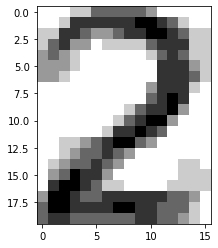

In [167]:
plt.imshow(train_mean.reshape(20,-1), cmap='gray')

## 각 숫자 평균 벡터 구해 표시 

In [184]:
train_means = np.empty([0,flat_size])
for number in range(10):
  indices = np.where(train_label == number)[0].tolist()
  train_mean = np.mean(train_feature[indices], axis=0).reshape(1, -1)
  train_means = np.append(train_means, train_mean, axis=0)
train_means.shape

(10, 320)

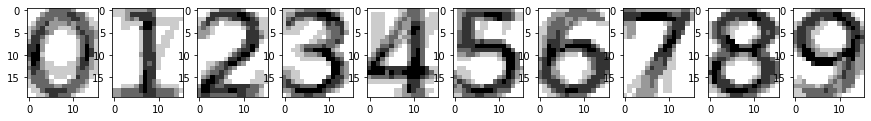

In [186]:
fig, axs = plt.subplots(1, 10, figsize=(15, 5))
for idx in range(10):
    axs[idx].imshow(train_means[idx].reshape(20,-1), cmap='gray')

# 결정경계

## 그래프로 판단

## 함수로 판단
$
y(x) = argmin_i {d(x, m_i)}
$
